In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv("./input/winemag-data_first150k.csv")

In [3]:
df_original.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [119]:
df_original.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


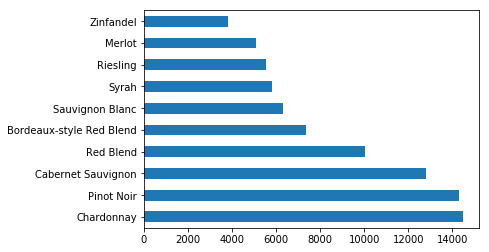

In [118]:
# Plot horizontal bar for varieties
df_original['variety'].value_counts().head(10).plot.barh(figsize=(6, 4))
#df_original.dim()

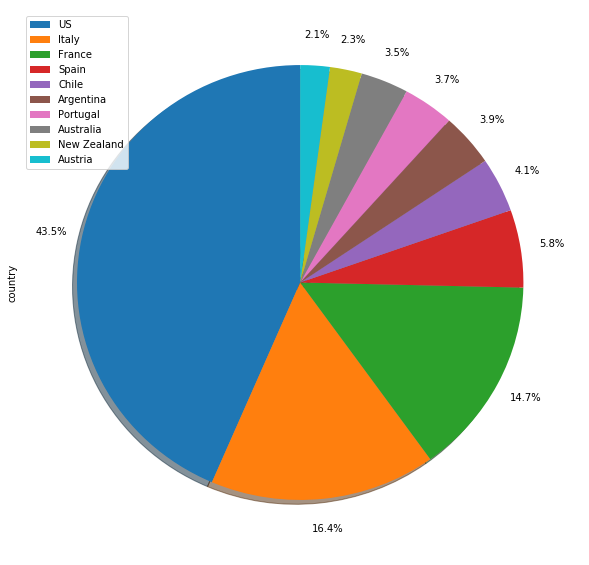

In [101]:
# Pie chart
df_original['country'].value_counts().head(10).plot(
    kind='pie',
    figsize=(10, 10),
    startangle=90,
    shadow=True,
    labels=None,
    autopct='%1.1f%%',
    pctdistance=1.14
)

plt.legend(labels=df_original['country'].value_counts().head(10).index, loc='best')

In [69]:
# bar plot
df_original['country'].value_counts().head(10).plot.bar()
# or
# df_original['country'].value_counts().plot(kind='bar')

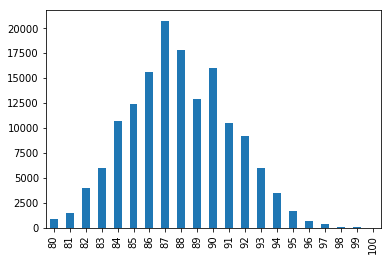

In [32]:
df_original['points'].value_counts().sort_index().plot.bar()

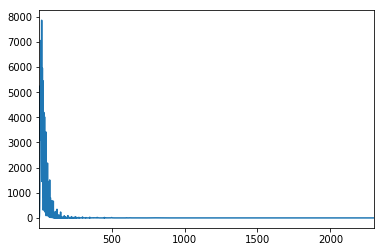

In [34]:
#Plot Price
df_original['price'].value_counts().sort_index().plot.line()

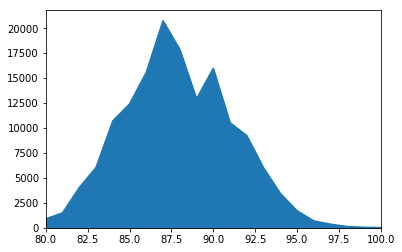

In [35]:
df_original['points'].value_counts().sort_index().plot.area()

Text(0.5,1,'Relship between price and points')

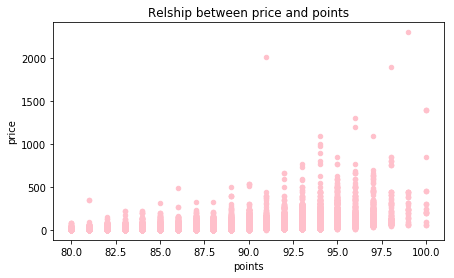

In [48]:
#Scatter Plot
pts_price = df_original.plot.scatter(x='points', y='price', figsize=(7, 4), color="pink")
pts_price.set_title('Relship between price and points')

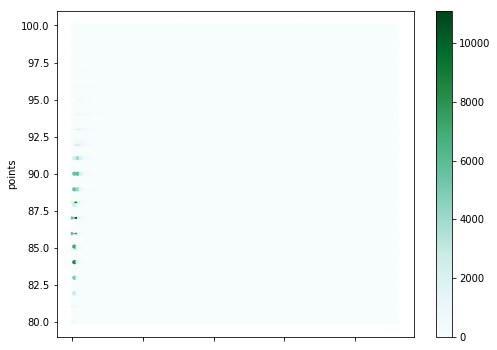

In [50]:
df_original.plot.hexbin(x='price', y='points', figsize=(8, 6))

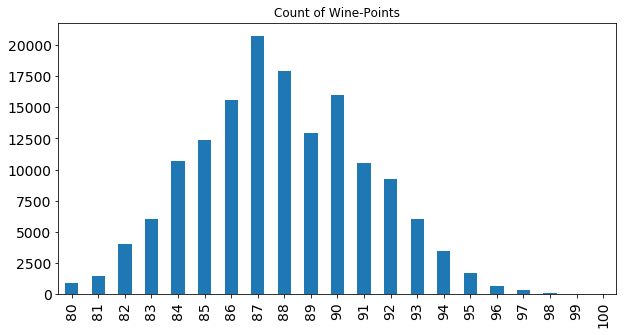

In [51]:
# Figsize argument
df_original['points'].value_counts().sort_index().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    title = "Count of Wine-Points"
)

Text(0,0.5,'Count')

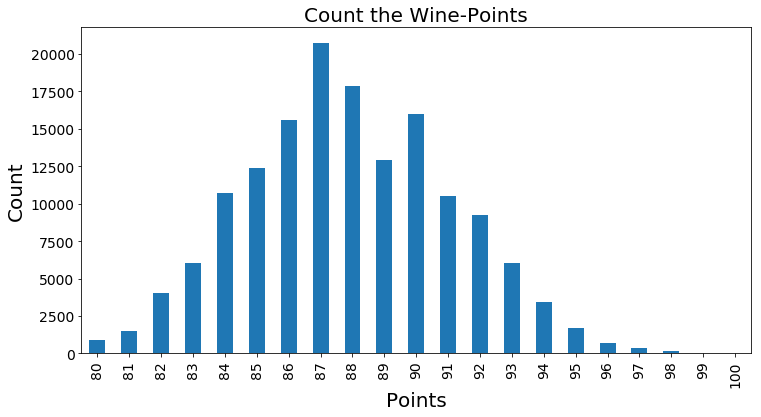

In [52]:
#Adjusting title fontsize using Matplotlib
import matplotlib as mlt

ax = df_original['points'].value_counts().sort_index().plot.bar(
    figsize = (12,6),
    fontsize = 14
)
ax.set_title("Count the Wine-Points", fontsize = 20)
ax.set_xlabel("Points", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)

Text(0.5,1,'No of Wines from Winery')

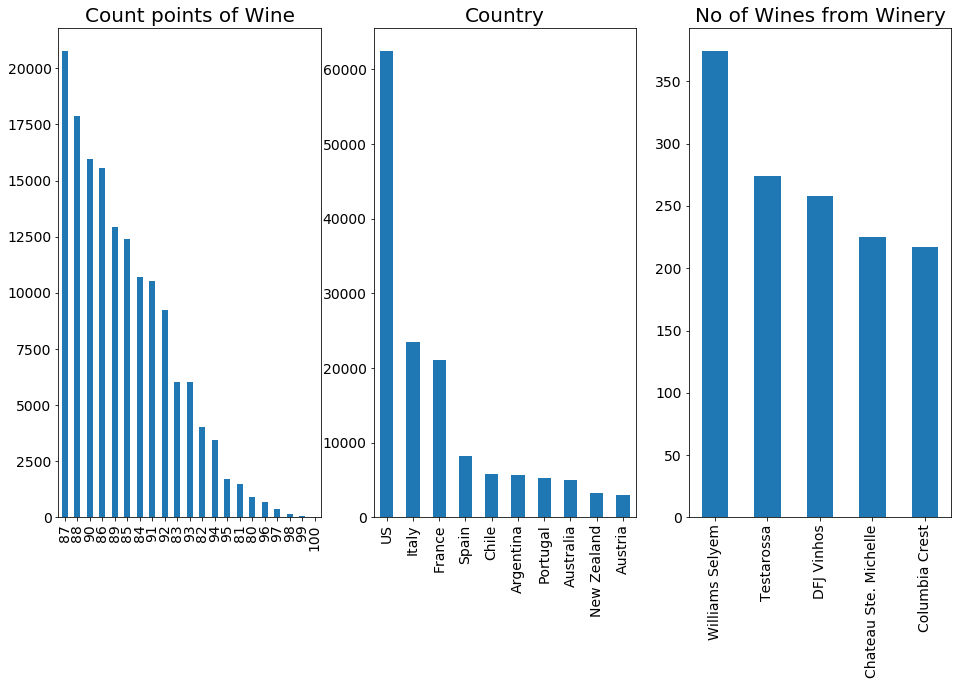

In [78]:
#Creating a frame of rows and columns to place the plots
fig = plt.figure(figsize=(16, 9))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

#plot1
df_original['points'].value_counts().plot.bar(
    ax = ax0,
    fontsize = 14    
)
ax0.set_title("Count points of Wine", fontsize = 20)
#Plot2
df_original['country'].value_counts().head(10).plot.bar(
    ax = ax1,
    fontsize = 14
)
ax1.set_title('Country', fontsize = 20)
#plot3
df_original['winery'].value_counts().head().plot.bar(
    ax = ax2,
    fontsize = 14
)
ax2.set_title("No of Wines from Winery", fontsize=20)

In [4]:
df_original.isnull().count()

Unnamed: 0     150930
country        150930
description    150930
designation    150930
points         150930
price          150930
province       150930
region_1       150930
region_2       150930
variety        150930
winery         150930
dtype: int64

# Exploring with *seaborn* package

In [5]:
 import seaborn as sns

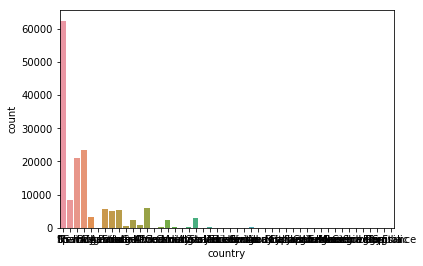

In [6]:
sns.countplot(df_original['country'])

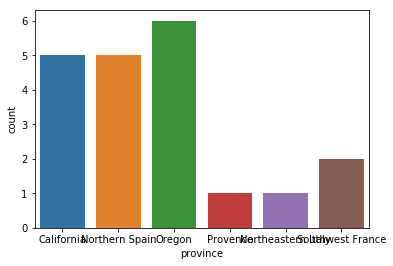

In [123]:
sns.countplot(df_original['province'].head(20))

In [127]:
sns.kdeplot(not df_original['price'].isnull())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Text(0.5,1,'Price of Wine')

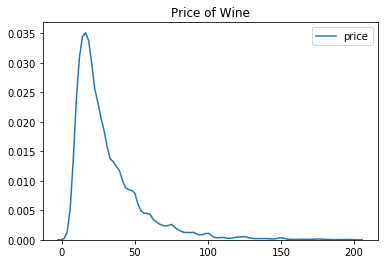

In [128]:
ax = sns.kdeplot(df_original.query('price < 200').price)
ax.set_title("Price of Wine")

C:\Users\surinder.kumar01\AppData\Local\conda\conda\envs\tia\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


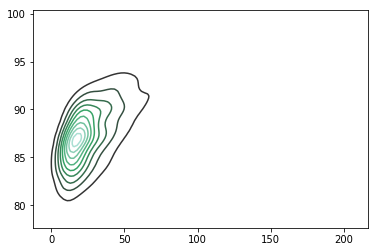

In [129]:
#KDE 2D plot
sns.kdeplot(df_original[df_original['price']< 200].loc[:,['price', 'points']].dropna().sample(5000))

# Histogram plot in *Seaborn*


C:\Users\surinder.kumar01\AppData\Local\conda\conda\envs\tia\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


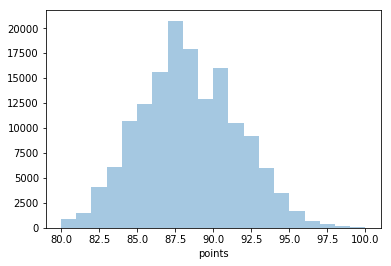

In [130]:
ax = sns.distplot(df_original['points'], bins = 20, kde = False)

In [134]:
df_original.variety.isin(df_original.variety.value_counts().head(5).index)

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

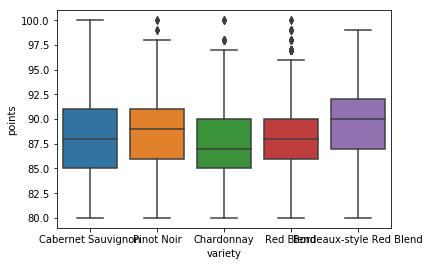

In [137]:
df1= df_original[df_original.variety.isin(df_original.variety.value_counts().head(5).index)]

sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df1
)

# Facet Grid

In [138]:
df_original.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


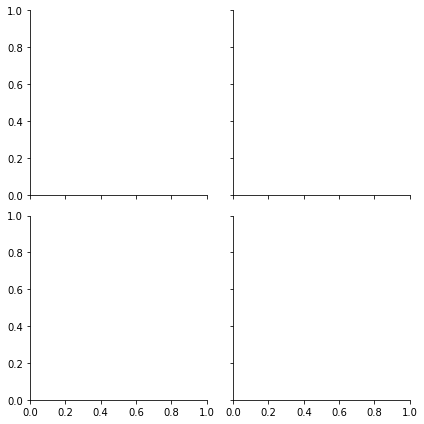

In [139]:
#Extract wine scores from two countries US and France
df = df_original[df_original['country'].isin(['US','France', 'Canada', 'Spain'])]
g = sns.FacetGrid(df, col = "country", col_wrap = 2)

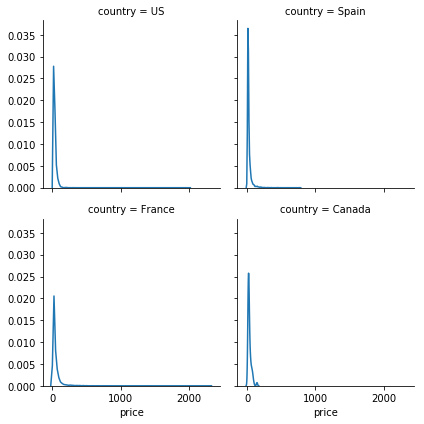

In [140]:
g = sns.FacetGrid(df, col = "country", col_wrap = 2)
g.map(sns.kdeplot, "price")

C:\Users\surinder.kumar01\AppData\Local\conda\conda\envs\tia\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


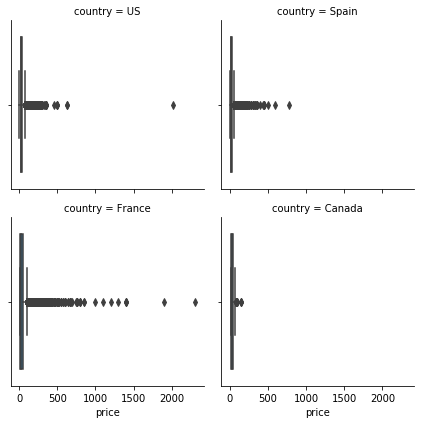

In [142]:
g = sns.FacetGrid(df, col = "country", col_wrap = 2)
g.map(sns.boxplot, "price")

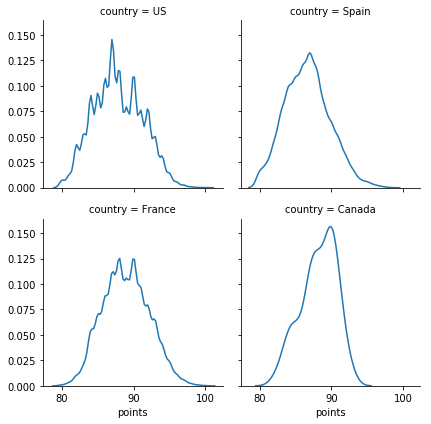

In [143]:
g = sns.FacetGrid(df, col = "country", col_wrap = 2)
g.map(sns.kdeplot, "points")

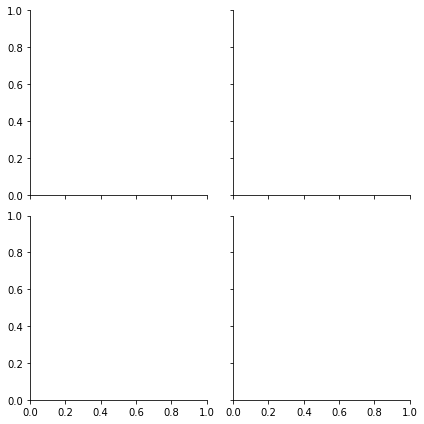

In [144]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col = "country", col_wrap = 2)

# Multi-Variant Plots

In [9]:
import re
import numpy as np

In [10]:
df_housing = pd.read_csv("./input/Melbourne_housing_FULL.csv")

In [11]:
df_housing.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [12]:
df_tmp = df_housing.dropna(how='any',axis=0) 

In [13]:
df_tmp.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [14]:
df_tmp2 = df_tmp[['Price', 'Distance', 'Rooms', 'Postcode', 'Bedroom2', 'Bathroom']]
df_tmp2.head()

,Price,Distance,Rooms,Postcode,Bedroom2,Bathroom
2,1035000.0,2.5,2,3067.0,2.0,1.0
4,1465000.0,2.5,3,3067.0,3.0,2.0
6,1600000.0,2.5,4,3067.0,3.0,1.0
11,1876000.0,2.5,3,3067.0,4.0,2.0
14,1636000.0,2.5,2,3067.0,2.0,1.0


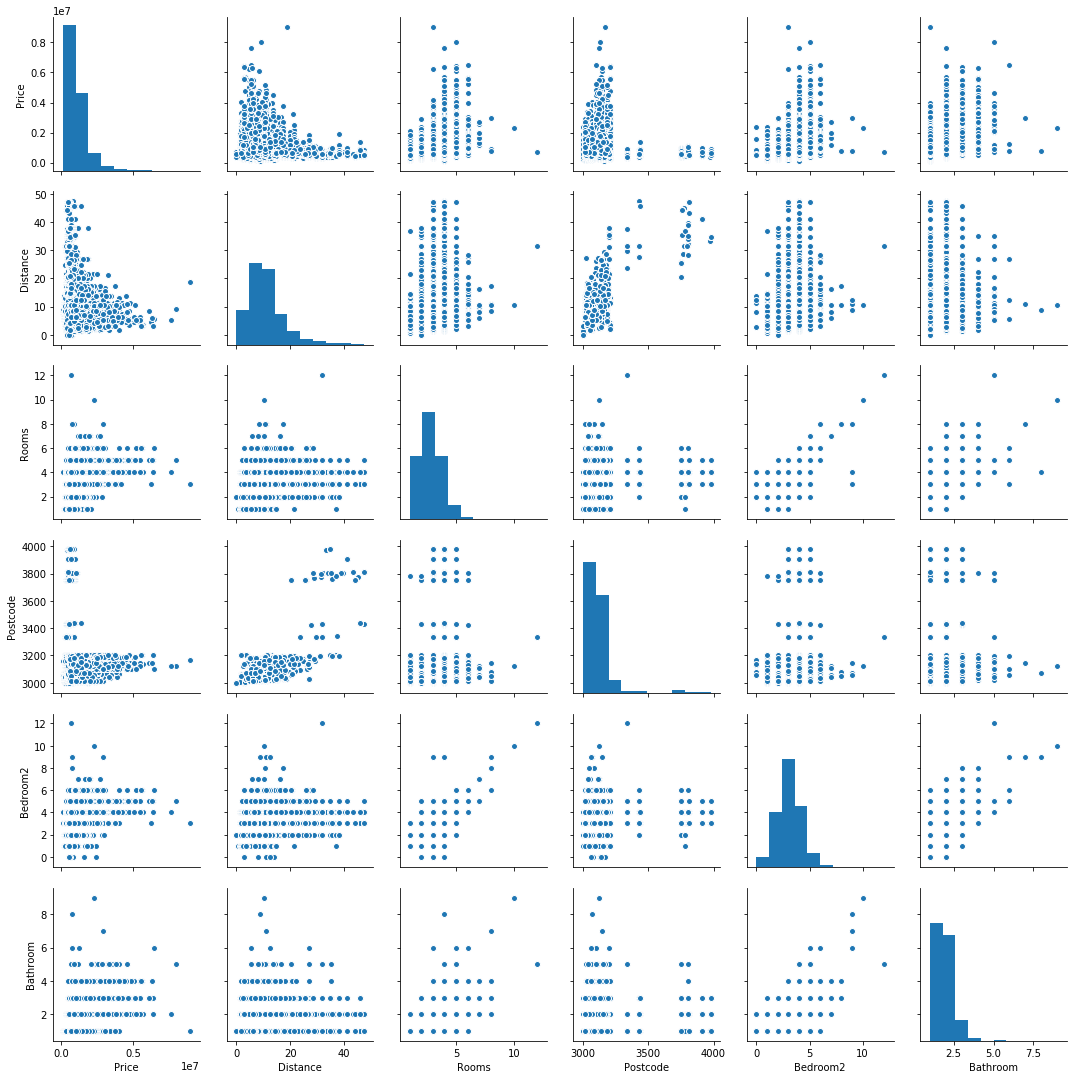

In [150]:
sns.pairplot(df_tmp2)

In [151]:
#check the colnaems
df_tmp.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

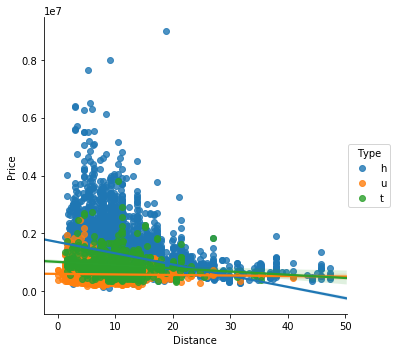

In [152]:
# Multivariant 
sns.lmplot(x='Distance', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

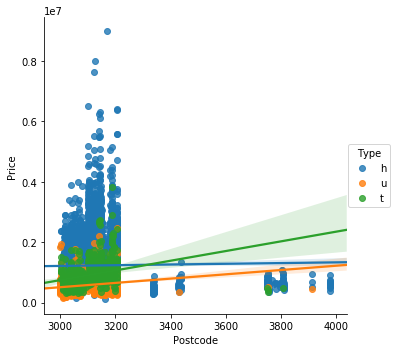

In [153]:
# Multivariant 
sns.lmplot(x='Postcode', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

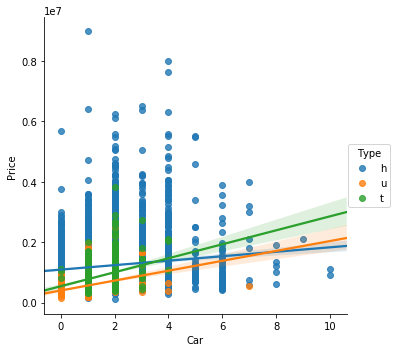

In [154]:
# Multivariant 
sns.lmplot(x='Car', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

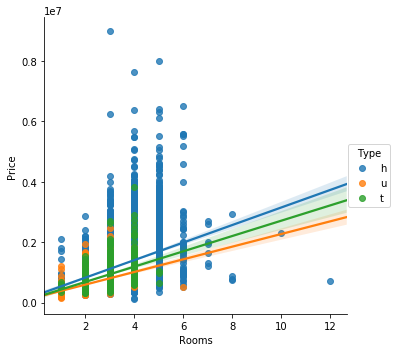

In [155]:
# Multivariant 
sns.lmplot(x='Rooms', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

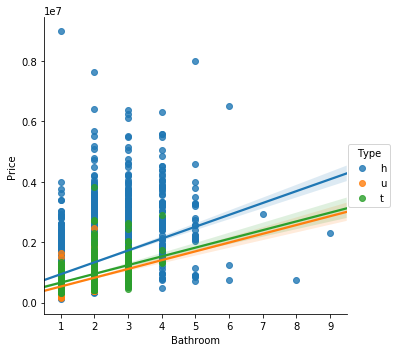

In [156]:
# Multivariant 
sns.lmplot(x='Bathroom', 
           y='Price',
          hue = 'Type',
          data = df_tmp)

## Visualization with Iris dataset

In [16]:
iris = sns.load_dataset("iris")

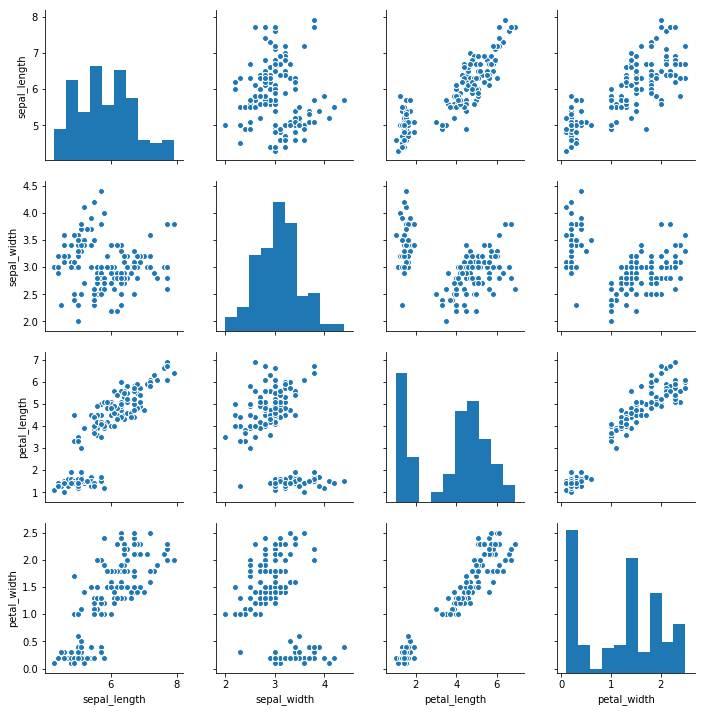

In [17]:
g = sns.pairplot(iris)

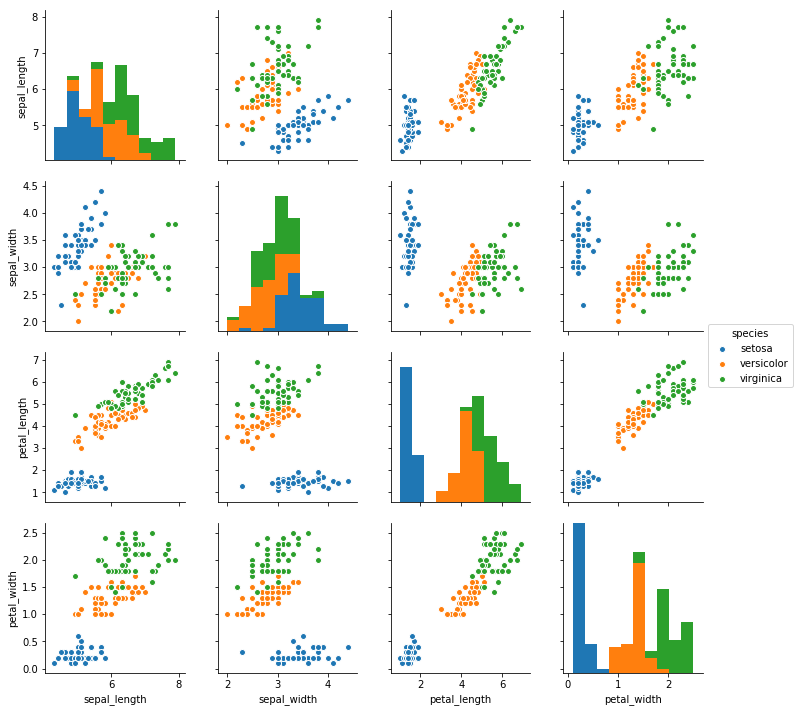

In [18]:
g = sns.pairplot(iris, hue='species')

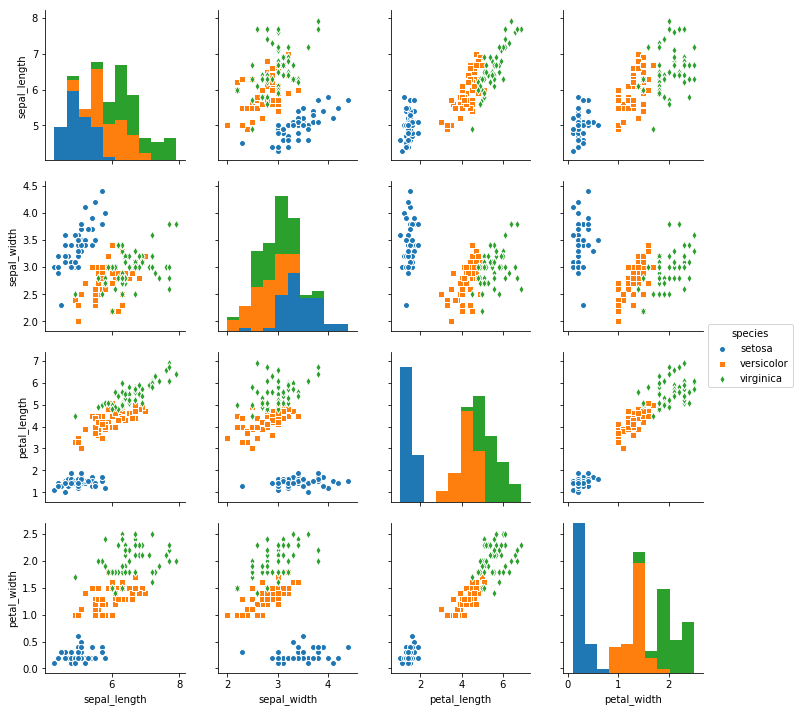

In [19]:
g = sns.pairplot(iris, hue='species', markers=["o", "s", "d"])

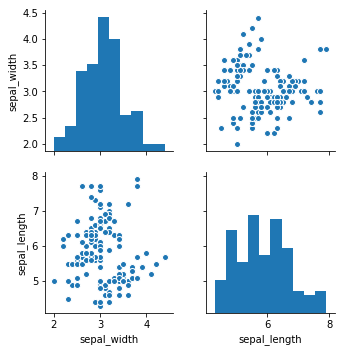

In [20]:
g = sns.pairplot(iris, vars=['sepal_width', 'sepal_length'])

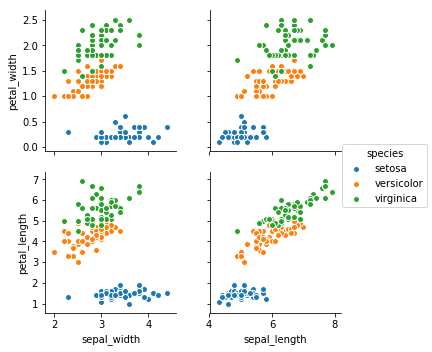

In [22]:
g = sns.pairplot(
    iris,
    x_vars=["sepal_width", "sepal_length"],
    y_vars=["petal_width", "petal_length"],
    hue="species"
)

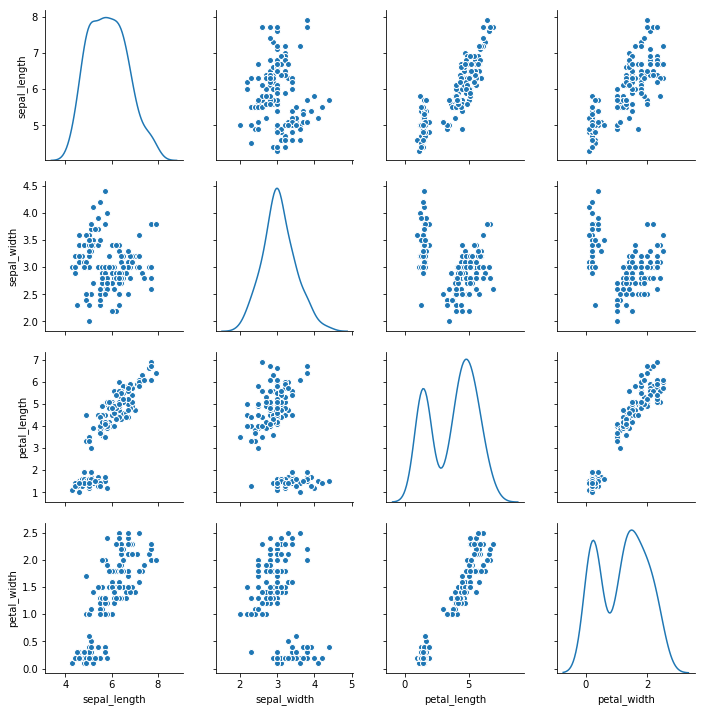

In [24]:
sns.pairplot(iris, diag_kind='kde')

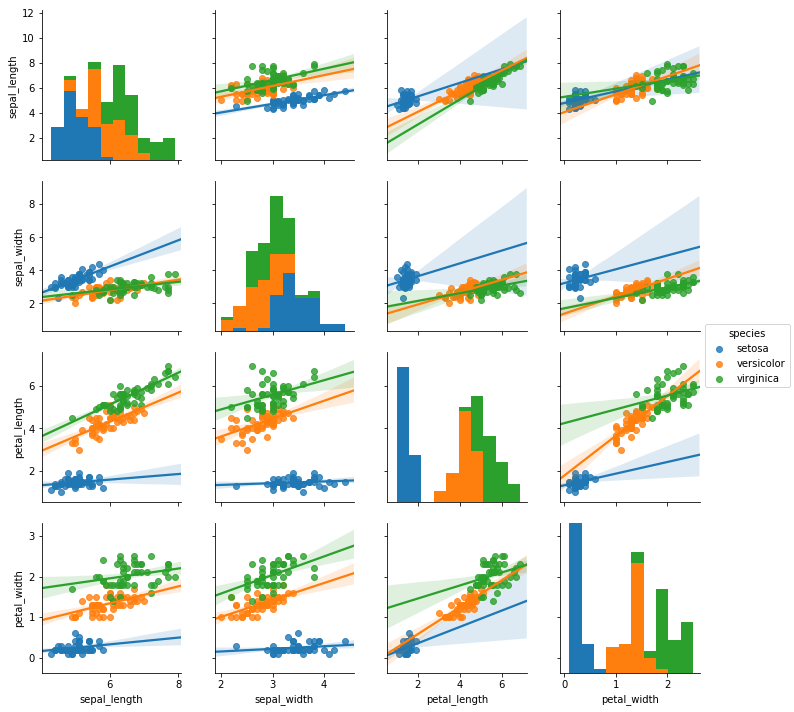

In [26]:
g = sns.pairplot(iris, kind="reg", hue="species")

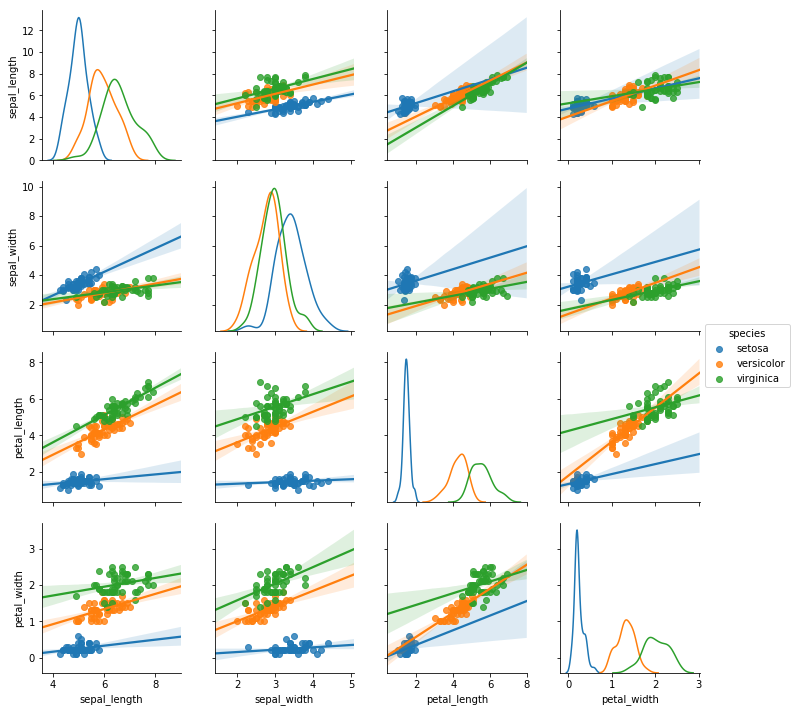

In [28]:
g = sns.pairplot(iris, kind="reg", hue="species", diag_kind="kde")

# Grouped boxplot

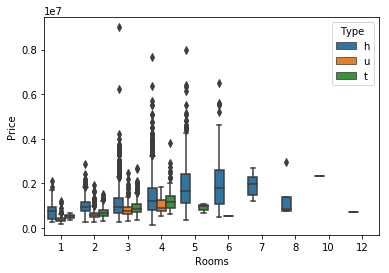

In [157]:
sns.boxplot(x='Rooms',
           y ='Price',
           hue = 'Type',
           data = df_tmp)

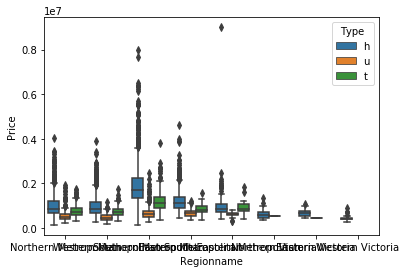

In [158]:
sns.boxplot(x='Regionname',
           y ='Price',
           hue = 'Type',
           data = df_tmp,
           )

# Heatplot


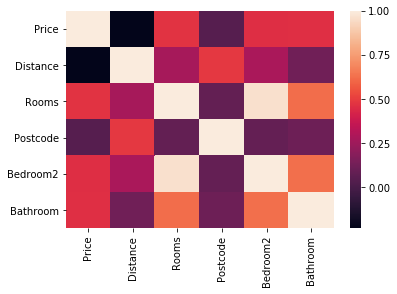

In [162]:
r = df_tmp2.corr()
sns.heatmap(r)

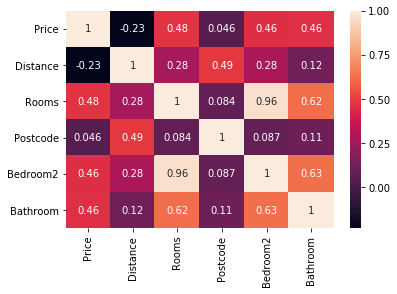

In [160]:
sns.heatmap(r, annot = True)